<a href="https://colab.research.google.com/github/weibb123/Instagram-Analysis/blob/main/Instagram_account_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Instagram reach is the metric to see how many people see your posts. If a content creator wants to do well on instagram for long run, they need to look at the data.

data https://statso.io/instagram-reach-analysis-case-study/

Impressions: Number of impressions in a post (Reach)

From Home: Reach from home

From Hashtags: Reach from Hashtags

From Explore: Reach from Explore

From Other: Reach from other sources

Saves: Number of saves

Comments: Number of comments

Shares: Number of shares

Likes: Number of Likes

Profile Visits: Numer of profile visits from the post

Follows: Number of Follows from the post

Caption: Caption of the post

Hashtags: Hashtags used in the post

# Import Dependencies

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [9]:
# need encoding latin1 or else raise ut-8 encode error
df = pd.read_csv("https://raw.githubusercontent.com/weibb123/Instagram-Analysis/main/Instagram%20data.csv", encoding='latin1')
df.head(5)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


# Explore Data Analysis

In [10]:
# Before we do anything, it is important to check for null values first
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

no nulls! if there does have nulls, we can do df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


Let's first analyze the reach of instagram posts by looking at the distribution of impressions from home.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



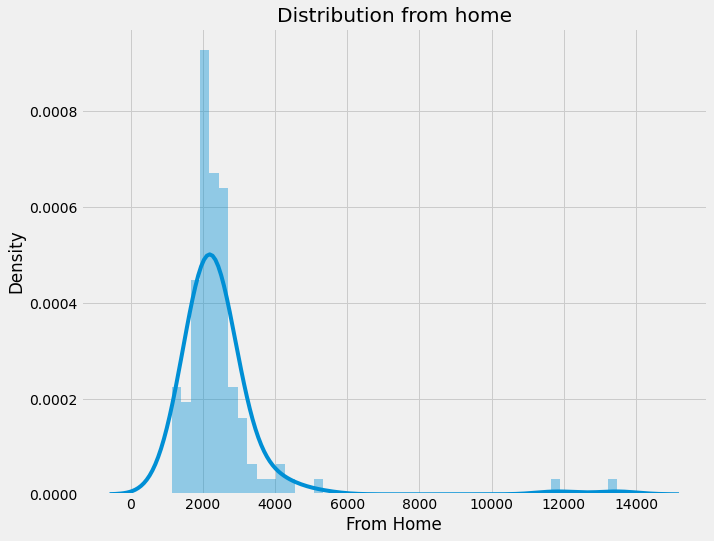

In [12]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution from home")
sns.distplot(df['From Home'])
plt.show()

## What it means?

Looking at the impression from home, I think it is hard to reach all the followers daily. Next, let's look at the impression from hashtags.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



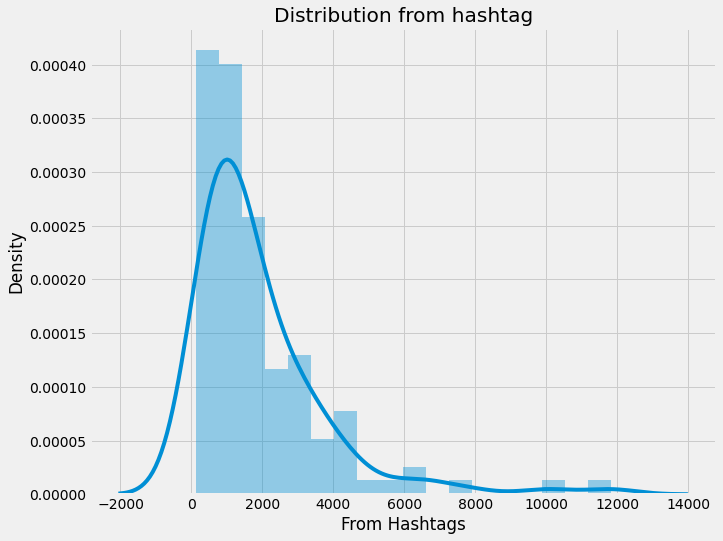

In [13]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution from hashtag")
sns.distplot(df['From Hashtags'])
plt.show()

## What it means?

Hashtags are tools we use to categorize posts on instagram so that people can reach more audiences on the content they are creating. Looking at this distribution, not many posts can be reached through hashtags, but it seems like hashtag allows more new people to see your post. You notice that the histogram gets thicker than the previous one. Next, let's look at the explored section.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



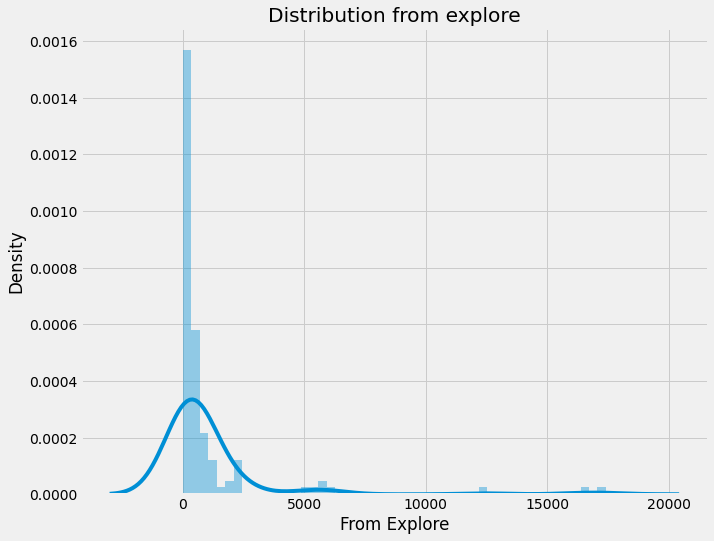

In [14]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution from explore")
sns.distplot(df['From Explore'])
plt.show()

## What it means?

Instagram's explore section governs by recommendation system. It recommends posts to users based on their preferences and interests. Looking at this distribution, we can see that Instagram does not recommend this account's posts to other users since the distribution is thin and center of distribution is close to 0.

## Percentage of impressions

Next, we will create a pie chart to see the percentage between explored, hashtag, and home.

In [16]:
home = df['From Home'].sum()
explore = df['From Explore'].sum()
hashtag = df['From Hashtags'].sum()
other = df['From Other'].sum()

labels = ['FROM HOME', 'FROM EXPLORE', 'FROM HASHTAG', 'FROM OTHER']
values = [home, explore, hashtag, other]

fig = px.pie(df, values=values, names=labels,
             title="Impressions on Instagram Posts From Various Sources", hole=0.5)
fig.show()

From this piechart, it looks like majority of instagram reach for this account comes from followers.

## Analyze Content

Next, we will analyze the content of instagram posts using wordCloud!

In [18]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

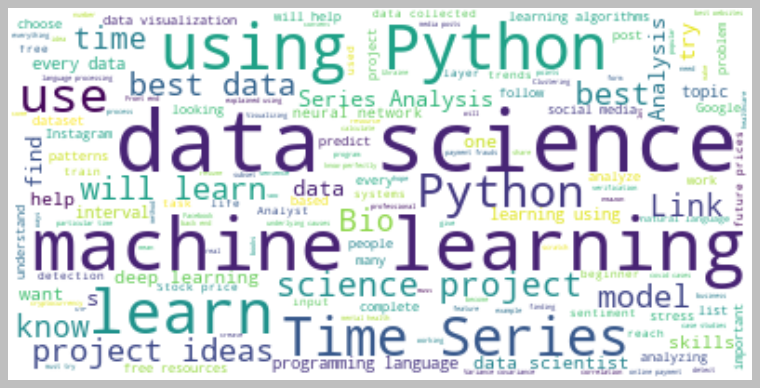

In [19]:
text = ' '.join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
figure = px.scatter(data_frame = df, x="Impressions", y='Likes', size='Likes', trendline="ols",
                    title = "Relationship Between Likes and Impressions")
figure.show()

## What it means?

There exist a linear relationship between the number of likes and the Instagram reach on Instagram. More view on the posts, more likes it receives.

Next, we will see the relationship between number of comments and number of impressions on instagram posts.

In [22]:
figure = px.scatter(data_frame = df, x="Impressions", y='Comments', size='Comments', trendline="ols",
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

Looking at the scatter plot, it seems like comments does not affect Instagram Reach by much.

In [23]:
# Checking the correlation on Impressions(Reach)
correlation = df.corr()
print(correlation['Impressions'].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


From this correlation results, we can see that top factors that can get you more Instagram Reach are more followers, save posts, and likes.

In [24]:
# Analyze Conversion rate
# Conversion rate means how many followers you are getting from number of profile visits from a post.
# (Follow / Profile visits ) * 100

conversion_rate = (df['Follows'].sum() / df['Profile Visits'].sum()) * 100
print(conversion_rate)

41.00265604249668


41% conversion rate means that you are getting 41% followers when they visit your profile from a post. Next, we will see the relationship between total profile visits and number of followers gained from all profile visits.

In [26]:
figure = px.scatter(data_frame=df, x="Profile Visits", y="Follows", size="Follows", trendline="ols",
                    title = "Relationship Between Profile visits and followers gained")
figure.show()

Linear relationship: More profile visits, help you gain more followers.

# Predictive Model


In [28]:
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.model_selection import train_test_split


x = np.array(df[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
y = np.array(df['Impressions'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
model = PassiveAggressiveRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8115485569527183

In [30]:
# Make predictions of an Instagram Post by giving inputs to the model
# Features = [['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([9561.44128401])